In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')
data.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
# Here, i will first remove the columns which are not useful at all
data.drop(data.columns[[0,8,9,10,11,12,15,16,17]],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [5]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])
data['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  int64  
 8   redshift  100000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


In [8]:
data2 = data.copy()

In [9]:
# Here we will try to predict the class for the given parameters.
X = data.drop('class',axis=1)
Y = data['class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)
Rmodel.score(X_test,y_test)

0.97785

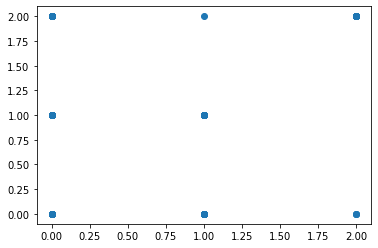

In [12]:
y_pred = Rmodel.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [13]:
#K nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model
knn.score(X_test,y_test)

0.8348

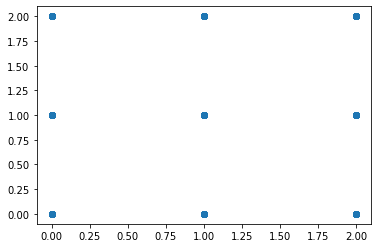

In [14]:
y_pred = knn.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [15]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3) # Define classifier
dt.fit(X_train, y_train) # Train model
dt.score(X_test,y_test)

0.95105

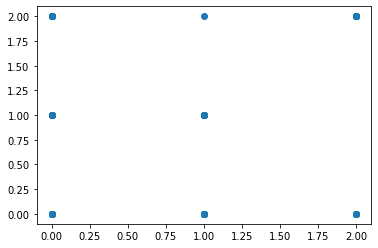

In [16]:
y_pred = dt.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [17]:
#Neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.91335

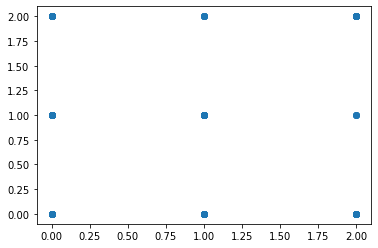

In [18]:
y_pred = mlp.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [19]:
data3 = data2[['redshift','class']]
y_pred = Rmodel.predict(X)
data3['Prediction'] = y_pred
data3.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,redshift,class,Prediction
0,0.634794,0,0
1,0.779136,0,0
2,0.644195,0,0


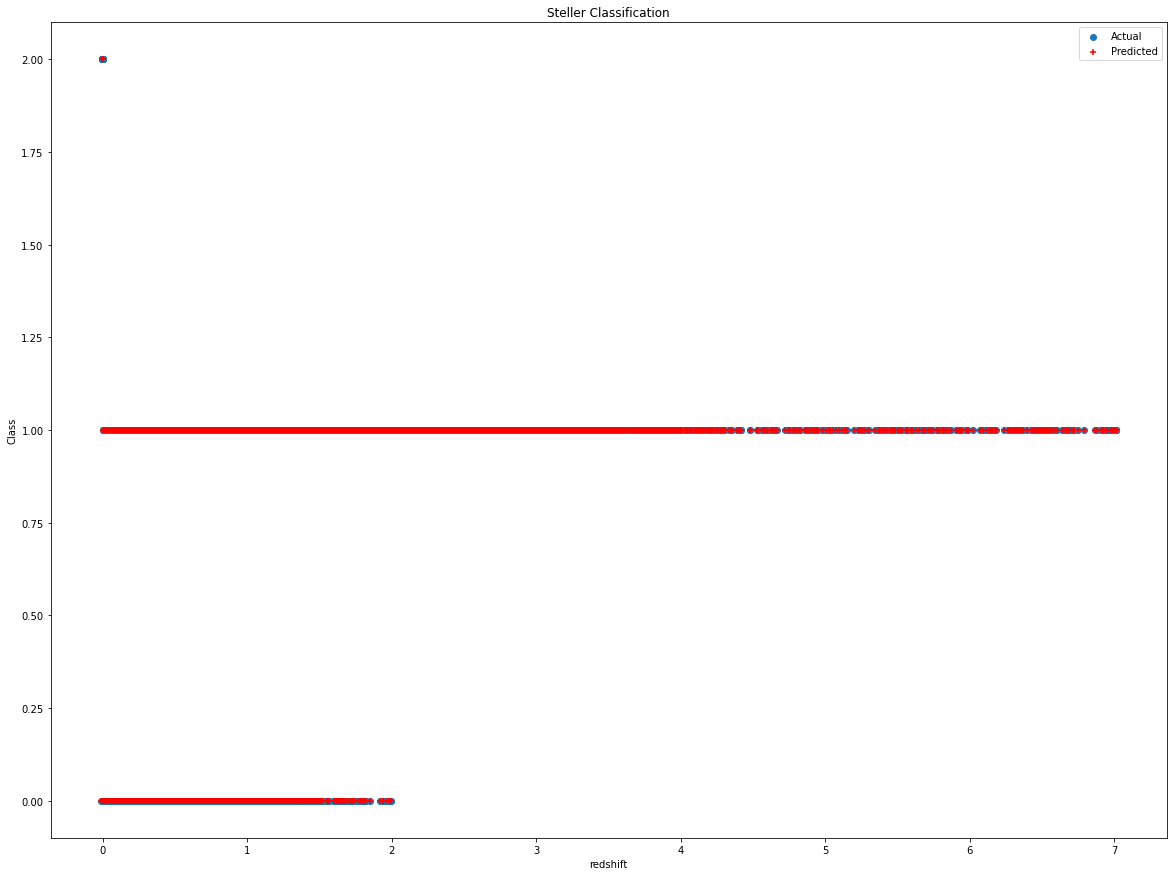

In [20]:
plt.figure(figsize=(20,15))
plt.scatter(data3['redshift'],data3['class'],label='Actual')
plt.scatter(data3['redshift'],data3['Prediction'],label='Predicted',color='r',marker='+')
plt.title("Steller Classification")
plt.xlabel("redshift")
plt.ylabel("Class")
plt.legend()
plt.show()

In [21]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-qx7xc1pr
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-qx7xc1pr
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [22]:
from pycaret.classification import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'class', session_id=669)

,Description,Value
0,Session id,669
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(100000, 9)"
4,Transformed data shape,"(100000, 9)"
5,Transformed train set shape,"(69999, 9)"
6,Transformed test set shape,"(30001, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [23]:
pycaret_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9781,0.9954,0.9781,0.9780,0.9779,0.9609,0.9610,25.8190
xgboost,Extreme Gradient Boosting,0.9778,0.9954,0.9778,0.9777,0.9777,0.9605,0.9606,16.2020
lightgbm,Light Gradient Boosting Machine,0.9776,0.9954,0.9776,0.9775,0.9775,0.9601,0.9602,1.2220
rf,Random Forest Classifier,0.9773,0.9945,0.9773,0.9772,0.9772,0.9596,0.9597,7.1900
gbc,Gradient Boosting Classifier,0.9757,0.9947,0.9757,0.9756,0.9755,0.9567,0.9569,27.9130
et,Extra Trees Classifier,0.9722,0.9932,0.9722,0.9722,0.9720,0.9506,0.9507,2.6810
dt,Decision Tree Classifier,0.9645,0.9676,0.9645,0.9646,0.9645,0.9371,0.9371,0.4630
lr,Logistic Regression,0.9497,0.9839,0.9497,0.9497,0.9493,0.9109,0.9111,10.3790
qda,Quadratic Discriminant Analysis,0.8970,0.9776,0.8970,0.9023,0.8953,0.8130,0.8166,0.0650
lda,Linear Discriminant Analysis,0.8459,0.9171,0.8459,0.8493,0.8400,0.7094,0.7198,0.0960


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [24]:
print(pycaret_models)

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model_2 = ExtraTreesRegressor(n_jobs=-1, random_state=669)
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.9604668145798412

In [26]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 991.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.2/398.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [27]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='class', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=data, time_limit=7*60)

No path specified. Models will be saved in: "AutogluonModels/ag-20220816_160515/"
Beginning AutoGluon training ... Time limit = 420s
AutoGluon will save models to "AutogluonModels/ag-20220816_160515/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    100000
Train Data Columns: 8
Label Column: class
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16388.25 MB
	Train Data (Original)  Memory Usage: 6.4 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw 

[1000]	valid_set's l2: 0.0363729
[2000]	valid_set's l2: 0.0327741
[3000]	valid_set's l2: 0.0309538
[4000]	valid_set's l2: 0.0301053
[5000]	valid_set's l2: 0.0295227
[6000]	valid_set's l2: 0.0289846
[7000]	valid_set's l2: 0.0284929
[8000]	valid_set's l2: 0.0281349
[9000]	valid_set's l2: 0.0278583
[10000]	valid_set's l2: 0.0276326


	-0.0276	 = Validation score   (-mean_squared_error)
	56.12s	 = Training   runtime
	1.12s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 360.17s of the 360.16s of remaining time.
	-0.0222	 = Validation score   (-mean_squared_error)
	3.04s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 357.06s of the 357.05s of remaining time.
	-0.0227	 = Validation score   (-mean_squared_error)
	102.48s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 254.19s of the 254.18s of remaining time.
	-0.0228	 = Validation score   (-mean_squared_error)
	27.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 226.37s of the 226.37s of remaining time.
	-0.0269	 = Validation score   (-mean_squared_error)
	9.59s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model fo

In [28]:
autogluon_automl.evaluate(data)

Evaluation: mean_squared_error on test data: -0.009383549061517837
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -0.009383549061517837,
    "root_mean_squared_error": -0.09686872075916889,
    "mean_absolute_error": -0.0281098819771702,
    "r2": 0.9859342449168238,
    "pearsonr": 0.9929813481005887,
    "median_absolute_error": -0.005153459031134844
}


{'mean_squared_error': -0.009383549061517837,
 'root_mean_squared_error': -0.09686872075916889,
 'mean_absolute_error': -0.0281098819771702,
 'r2': 0.9859342449168238,
 'pearsonr': 0.9929813481005887,
 'median_absolute_error': -0.005153459031134844}

<AxesSubplot:>

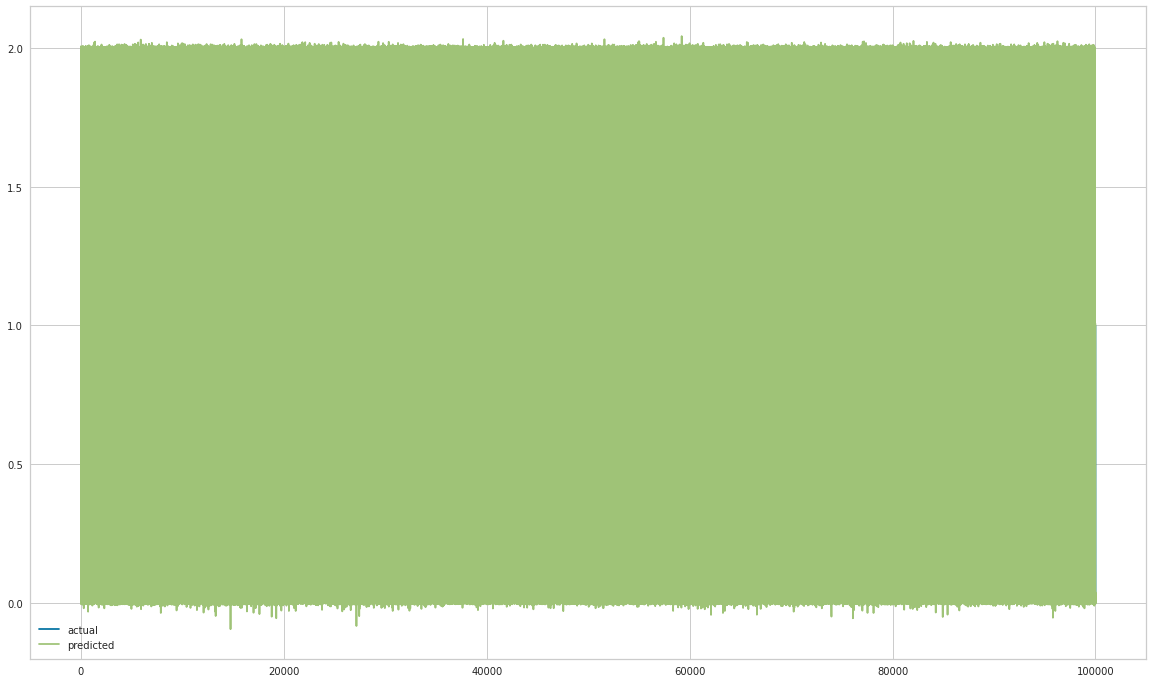

In [29]:
y_pred = autogluon_automl.predict(X)
autogluon_compare = pd.DataFrame(data={'actual': data['class'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(20, 12))

In [30]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9j2fp_ft
  JVM stdout: /tmp/tmp9j2fp_ft/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9j2fp_ft/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.396 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [31]:
h2o_frame = h2o.H2OFrame(data)
x = h2o_frame.columns
y = 'class'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=7*60, seed=667)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220816_161249

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01653073866448128
RMSE: 0.12857192020220154
MAE: 0.043211647940895714
RMSLE: 0.08714292802126032
R^2: 0.9752051382266783
Mean Residual Deviance: 0.01653073866448128
Null degrees of freedom: 9949
Residual degrees of freedom: 9943
Null deviance: 6633.681629995211
Residual deviance: 164.48084971158872
AIC: -12567.333323645447

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.02063926895824416
RMSE: 0.1436637357103182
MAE: 0.04655557532013063
RMSLE: 0.0971220062332777
R^2: 0.9690621426542096
Mean Residual Deviance: 0.02063926895824416
Null degrees of freedom: 99999
Residual degrees of freedom: 99993
Null deviance: 66

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.046557,0.001301,0.048672,0.045106,0.046249,0.046251,0.046508
1,mean_residual_deviance,0.020642,0.001439,0.023089,0.019341,0.019960,0.020297,0.020521
2,mse,0.020642,0.001439,0.023089,0.019341,0.019960,0.020297,0.020521
3,null_deviance,13342.615000,135.142790,13167.691000,13328.929000,13531.319000,13284.866000,13400.273000
4,r2,0.969048,0.002338,0.964986,0.970889,0.970255,0.969642,0.969465
5,residual_deviance,412.785370,28.040613,460.973570,388.012360,402.480900,403.299770,409.160300
6,rmse,0.143604,0.004925,0.151951,0.139071,0.141281,0.142467,0.143250
7,rmsle,0.097091,0.002854,0.101871,0.094188,0.096572,0.096174,0.096652


In [33]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_1_20220816_161249,0.0206393,0.143664,0.0465556,0.097122,0.0206393,1157,0.054182,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220816_161249,0.0206402,0.143667,0.046554,0.0971212,0.0206402,1332,0.050736,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220816_161249,0.0206428,0.143676,0.0467061,0.0971347,0.0206428,1131,0.045866,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220816_161249,0.0209312,0.144676,0.0474269,0.0978421,0.0209312,725,0.017545,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220816_161249,0.0209317,0.144678,0.0475303,0.0978182,0.0209317,697,0.019007,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220816_161249,0.0214976,0.146621,0.0533628,0.0993444,0.0214976,1155,0.023166,StackedEnsemble
GBM_3_AutoML_1_20220816_161249,0.0218463,0.147805,0.0544844,0.0998214,0.0218463,6692,0.015742,GBM
GBM_1_AutoML_1_20220816_161249,0.0219645,0.148204,0.0547139,0.100245,0.0219645,10877,0.021692,GBM
XGBoost_2_AutoML_1_20220816_161249,0.0220933,0.148638,0.0454006,0.100774,0.0220933,4477,0.002488,XGBoost
GBM_4_AutoML_1_20220816_161249,0.022149,0.148825,0.0567637,0.100651,0.022149,8217,0.019143,GBM


In [34]:
from h2o.model.regression import h2o_mean_squared_error,h2o_explained_variance_score

h2o_frame_test = h2o.H2OFrame(data)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(data[['class']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.01384186112157157

In [35]:
h2o_explained_variance_score(y_actual,y_pred)

0.9792513238851257

In [36]:
y_pred = h2o.as_list(y_pred)
y_pred = y_pred.values.flatten()
y_pred.shape

(100000,)

<AxesSubplot:>

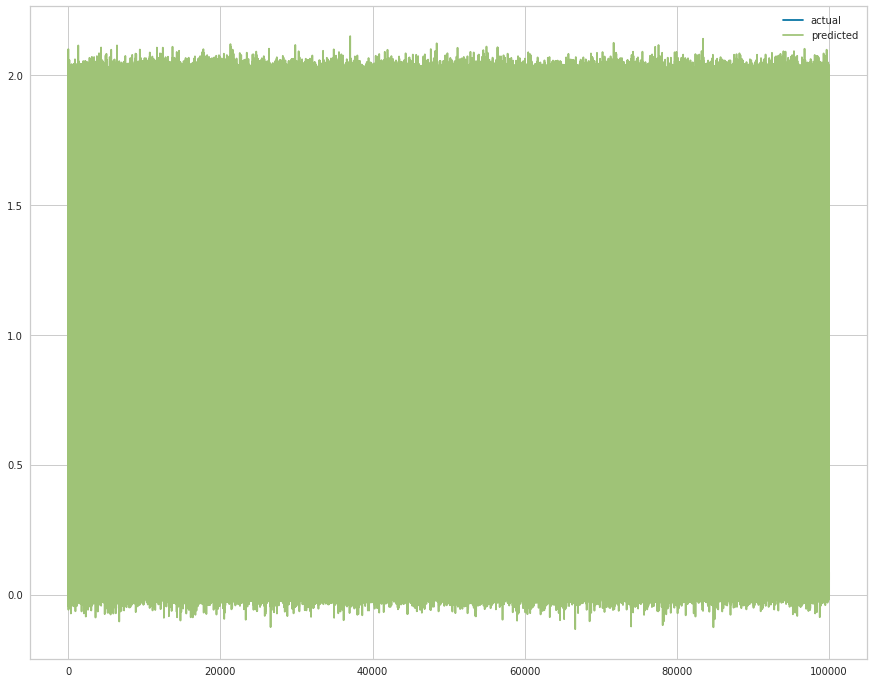

In [37]:
h2o_model = pd.DataFrame(data={'actual': data['class'], 'predicted': y_pred})
h2o_model.plot(figsize=(15, 12))